<a href="https://colab.research.google.com/github/EmmanueleVilla/Tensorflow---Serie-youtube/blob/main/Tensorflow%20%233%20-%20Confusion%20Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random as random
tf.__version__

'2.8.2'

In [3]:
# 1. Import the dataset
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data.shape

(60000, 28, 28)

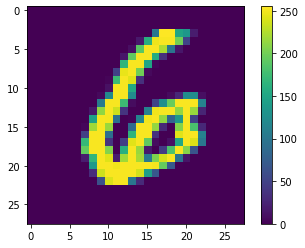

In [6]:
# 2. Show some data example
plt.figure()
plt.imshow(random.choice(train_data))
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# 3. Create the neural network model

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Lambda(lambda x : x / 255.0),
        tf.keras.layers.Dense(56, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)

In [8]:
# 4. Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [9]:
# 5. Fit the model
history = model.fit(train_data, train_labels, epochs=10, verbose=0)

In [10]:
# 6. Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)

313/313 [==============================] - 2s 3ms/step - loss: 0.3098 - accuracy: 0.9146


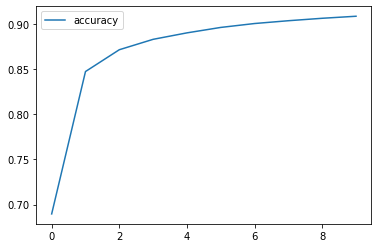

In [11]:
# 7. Plot the training history
pd.DataFrame(history.history)[["accuracy"]].plot()

In [12]:
# 8. Predict the test data
test_preds = model.predict(test_data)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
test_labels.shape, test_preds.shape

((10000,), (10000, 10))

In [15]:
test_labels[0], test_preds[0]

(7, array([3.6866590e-04, 5.8298992e-06, 5.8434927e-04, 2.7033514e-03,
        3.1450265e-05, 1.9571121e-04, 3.1361535e-06, 9.9341702e-01,
        5.8305257e-05, 2.6323241e-03], dtype=float32))

In [16]:
test_preds_sparse = tf.argmax(test_preds, axis=1)

In [17]:
test_preds_sparse[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])>

In [18]:
matrix = confusion_matrix(test_labels, test_preds_sparse)
matrix

array([[ 958,    0,    3,    2,    0,    4,    9,    1,    3,    0],
       [   0, 1105,    2,    3,    0,    1,    4,    1,   19,    0],
       [  13,    5,  908,   14,   16,    2,   14,   15,   39,    6],
       [   3,    0,   19,  913,    0,   31,    3,   15,   18,    8],
       [   1,    3,    5,    0,  917,    1,   11,    2,    5,   37],
       [  11,    3,    6,   49,    9,  764,   13,    6,   24,    7],
       [  15,    3,    3,    1,   13,   17,  900,    1,    5,    0],
       [   4,   10,   28,    6,    8,    0,    0,  934,    3,   35],
       [   9,   11,    8,   23,   11,   21,   13,   11,  854,   13],
       [  14,    6,    5,   11,   44,   10,    0,   21,    5,  893]])

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

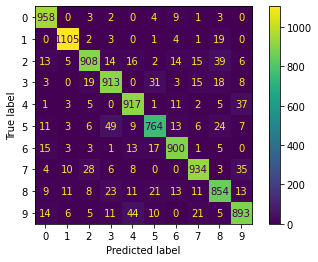

In [20]:
ConfusionMatrixDisplay.from_predictions(test_labels, test_preds_sparse)

In [21]:
def plot_wrong_labeled_data(X_test, y_true, y_preds, label_to_check, wrong_label = None):
  # Search for the wrong data
  wrongs = []
  for i in range(len(X_test)):
    true_label_found = y_true[i] == label_to_check
    wrong_label_found = wrong_label != None and y_preds[i] == wrong_label
    wrong_preds_label = wrong_label == None and y_preds[i] != label_to_check
    if true_label_found and (wrong_label_found or wrong_preds_label):
      wrongs.append((X_test[i], y_preds[i]))
  
  # Shuffle result
  random.shuffle(wrongs)

  # Plot result
  plt.figure(figsize=(10,10))
  for i in range(25):
    wrong = wrongs[i]
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wrong[0], cmap=plt.cm.binary)
    plt.text(14, 32, wrong[1].numpy())
  plt.show()

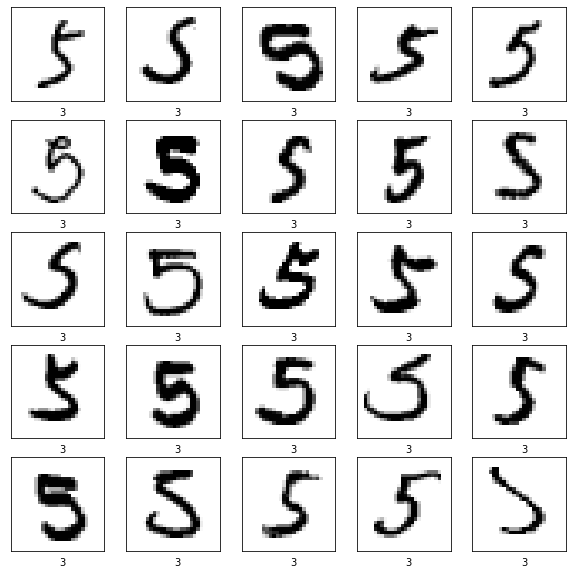

In [22]:
plot_wrong_labeled_data(test_data, test_labels, test_preds_sparse, 5, 3)